# PROJECT TITTLE :INSURANCE  PREMIUN PREDICTION

# Problem Statement:

   The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

# Approach: 

   The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.
Some Famous Algorithms: - Multiple Linear Regression, Decision tree Regression and
Gradient Boosting, Decision tree, Regression

# Results:

   You have to build a solution that should able to predict the premium of the personal for health insurance

# import standard library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\SATHYANARAYANA M\\Downloads\\Insurance Premium Prediction\\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# shape of data

In [4]:
print(f"Rows:{df.shape[0]} , columns: {df.shape[1]}")
## The "f" at the beginning of the string denotes that this is an f-string, 
## and the expressions inside curly braces are 
## evaluated and replaced with their values at runtime.

Rows:1338 , columns: 7


# About data

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# checking null values

In [6]:
df.isnull().sum()/df.shape[0]*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

#### no null values

In [7]:
df.describe().T ## T- transposes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
df.mean() #### mean of numerical data

C:\Users\SATHYANARAYANA M\AppData\Local\Temp\ipykernel_19572\4158672075.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() #### mean of numerical data


age            39.207025
bmi            30.665471
children        1.094918
expenses    13270.422414
dtype: float64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Doing combination

In [10]:
from itertools import combinations ### doing of combination its easy to all columns and analysis easly

In [11]:
list(combinations(df.select_dtypes(exclude=object).columns,2))

[('age', 'bmi'),
 ('age', 'children'),
 ('age', 'expenses'),
 ('bmi', 'children'),
 ('bmi', 'expenses'),
 ('children', 'expenses')]

# checking pearsonr correlation

# checking relationship between numeric columns

In [12]:
from scipy.stats import pearsonr

In [13]:
pearsonr(df['age'],df['bmi']) #### checking for just tow column

PearsonRResult(statistic=0.10934101460268024, pvalue=6.12782198063157e-05)

In [14]:
result = pd.DataFrame()
var1 = []
var2 = []
corr = []
prob = []
conclusion = []
for i,j in list(combinations(df.select_dtypes(exclude=object).columns,2)):
    correlation = pearsonr(df[i],df[j])
    corr.append(correlation[0])
    prob.append(correlation[1])
    var1.append(i)
    var2.append(j)
    if correlation[1]<0.05:
        conclusion.append('significante')
    else:
        conclusion.append('not significante')
result['variable_1'] = var1
result['variable_2'] = var2
result['correlation'] = corr
result['p-value'] = prob
result['conclusion'] = conclusion
result

,variable_1,variable_2,correlation,p-value,conclusion
0,age,bmi,0.109341,6.127822e-05,significante
1,age,children,0.042469,1.204928e-01,not significante
2,age,expenses,0.299008,4.886696e-29,significante
3,bmi,children,0.012645,6.440004e-01,not significante
4,bmi,expenses,0.198576,2.301828e-13,significante
5,children,expenses,0.067998,1.285212e-02,significante


there is no relationship betweeen age and children ,bmi and children 
so there is no need the importance of analysis of this columns

# Chi Square Test

# checking relationship between categorical variable

In [15]:
from scipy.stats import chi2_contingency

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Sex and Somker

In [18]:
chi = pd.crosstab(df['sex'],df['smoker'])

In [19]:
chi

smoker,no,yes
sex,,
female,547,115
male,517,159


In [20]:
stat ,p ,dof ,exp = chi2_contingency(chi)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.006548143503580696
Dependent (reject H0)


In [21]:
print(stat)
print(p)
print(dof)
print(exp)

7.39291081459996
0.006548143503580696
1
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


so sex and somker dependent each other 

# Sex and Region

In [22]:
chi = pd.crosstab(df['sex'],df['region'])

stat ,p ,dof ,exp = chi2_contingency(chi)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9328921288772233
Independent (H0 holds true)


## sex and Region are Independent each other 

In [23]:
chi = pd.crosstab(df['region'],df['smoker'])

stat ,p ,dof ,exp = chi2_contingency(chi)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.06171954839170541
Independent (H0 holds true)


Independent each other

# spliting categorical and numerical

In [24]:
## spliting cat and num to do EDA process easyly

## Numerical

In [25]:
num = df.select_dtypes(exclude='O')

In [26]:
num

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


## Categorical

In [27]:
cat = df.select_dtypes(include='O')    

In [28]:
cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


# Visualization

### Kde plot to view how my data is spred

##### using subplots to view all columns plot in single row

C:\Users\SATHYANARAYANA M\AppData\Local\Temp\ipykernel_19572\712761449.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_xticklabels(z.get_xticklabels(),rotation=25)
C:\Users\SATHYANARAYANA M\AppData\Local\Temp\ipykernel_19572\712761449.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_xticklabels(z.get_xticklabels(),rotation=25)
C:\Users\SATHYANARAYANA M\AppData\Local\Temp\ipykernel_19572\712761449.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_xticklabels(z.get_xticklabels(),rotation=25)
C:\Users\SATHYANARAYANA M\AppData\Local\Temp\ipykernel_19572\712761449.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_xticklabels(z.get_xticklabels(),rotation=25)


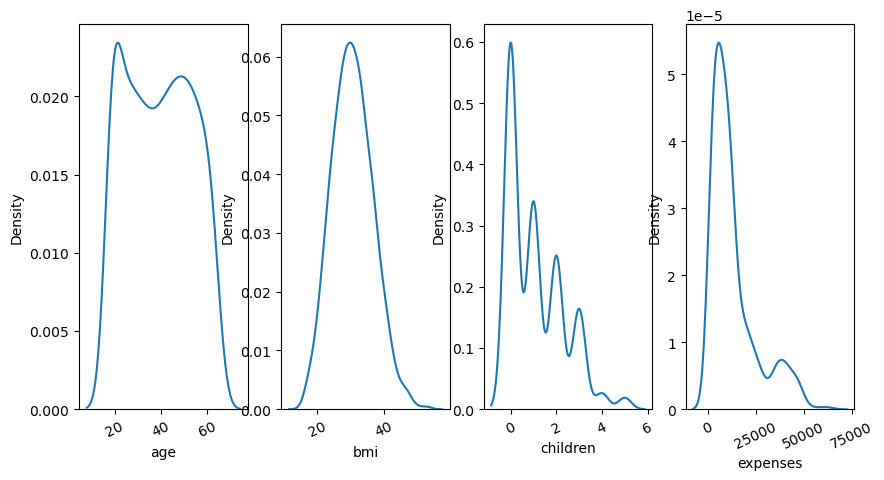

In [86]:
fig,ax= plt.subplots(nrows=1,ncols=4,figsize=(10, 5)) 

for variable, subplot in zip(num.columns,ax.flatten()):
    
    z = sns.kdeplot(x = num[variable],ax=subplot )
    
    z.set_xlabel(variable, fontsize = 10)
    
    z.set_xticklabels(z.get_xticklabels(),rotation=25)

# countplot 

In [84]:
a = []
for i in cat.columns:
    vv = cat.value_counts(i,normalize=True)
    a.append(vv)
    
pd.DataFrame(a)

,male,female,no,yes,southeast,northwest,southwest,northeast
0,0.505232,0.494768,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.795217,0.204783,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.272048,0.2429,0.2429,0.242152


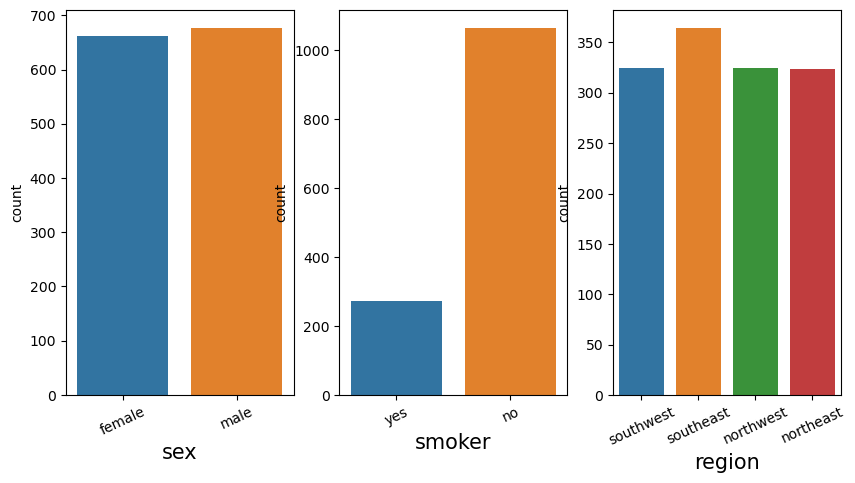

In [82]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(10, 5)) 

for variable, subplot in zip(cat.columns,ax.flatten()):
    z = sns.countplot(x = cat[variable],ax=subplot )
    z.set_xlabel(variable, fontsize = 15)
    z.set_xticklabels(z.get_xticklabels(),rotation=25)

In [83]:
df.value_counts('sex',normalize=True)

sex
male      0.505232
female    0.494768
dtype: float64

Text(0.5, 1.0, 'somker based on sex')

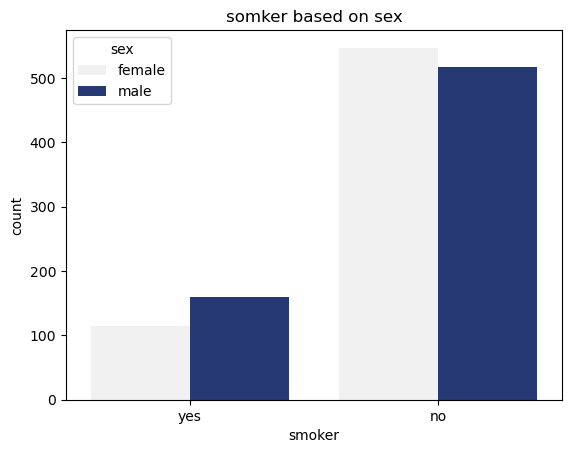

In [59]:
sns.countplot(x="smoker", data=cat, hue = 'sex',color=(0.1, 0.2, 0.5))
plt.xlabel('smoker')
plt.title('somker based on sex')

Text(0.5, 1.0, 'region based on smoker')

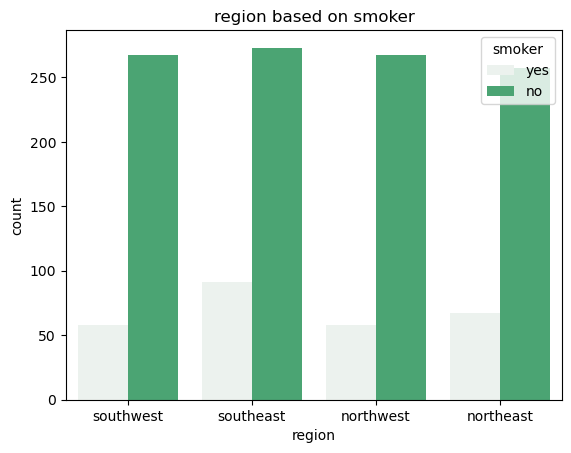

In [57]:
sns.countplot(x="region", data=cat, hue = 'smoker',color='mediumseagreen')
plt.xlabel('region')
plt.title('region based on smoker')

In [66]:
def aa(y):
    sns.countplot(x=y, data=df)
    return df.value_counts(y)

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

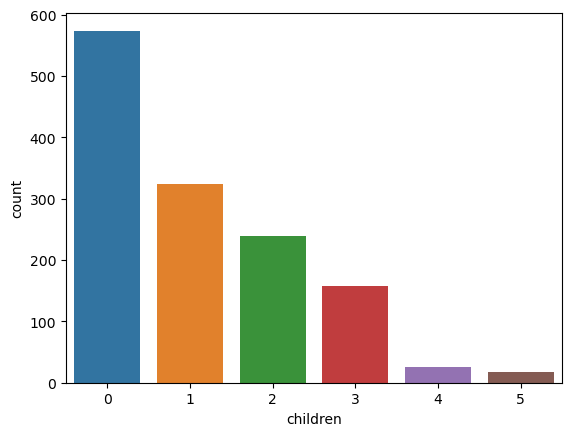

In [67]:
aa('children')

# Checking Outlier

<Axes: >

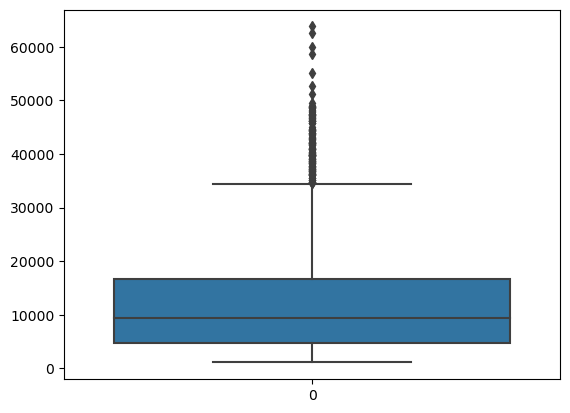

In [146]:
sns.boxplot(df.expenses)

# Removing Outlier

In [147]:

percentile25 = df['expenses'].quantile(0.25)
percentile75 = df['expenses'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [148]:
print(upper_limit)
print(lower_limit)

34489.35625
-13109.15375


In [149]:
df['expenses'] = np.where(df['expenses'] > upper_limit, upper_limit, df['expenses'])

<Axes: >

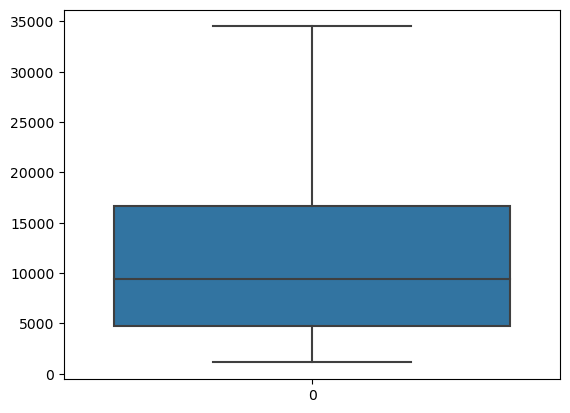

In [150]:
sns.boxplot(df.expenses)

# LableEncoder

In [152]:
uni = []
for i in cat.columns:
    a = np.unique(cat[i]) ########### unique use in numpy
    uni.append(a)

In [153]:
uni

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
LabelEncoder_1 = LabelEncoder()

In [156]:
LabelEncoder_1.fit_transform(df['sex'])

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [157]:
df['sex'] = LabelEncoder_1.fit_transform(df['sex'])

In [158]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [159]:
df['region'] = LabelEncoder_1.fit_transform(df['region'])

In [160]:
df['smoker'] = LabelEncoder_1.fit_transform(df['smoker'])

In [161]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


# spliting x and y

In [162]:
x = df.iloc[:,:-1]

In [163]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [164]:
y = df.iloc[:,-1]

In [165]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

## scaling

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()

In [168]:
x_scaler = scaler.fit_transform(x)

In [169]:
x_scaler

array([[-1.43876426, -1.0105187 , -0.4536457 , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.51418574, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38295436,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02270734, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79812808, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.25679863, -0.90861367,  1.97058663,
        -0.46691549]])

# spliting xtrain and ytrain and xtest and ytest

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaler,y,test_size=0.3,random_state=42)

In [172]:
df.shape

(1338, 7)

In [173]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(936, 6)
(402, 6)
(936,)
(402,)


# linear Regression OLS method

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
import statsmodels.api as sm

In [176]:
X = sm.add_constant(x_scaler)

In [177]:
model_1 = sm.OLS(y, X)

In [178]:
model_1

In [179]:
results = model_1.fit()

In [180]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     657.0
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        01:06:01   Log-Likelihood:                -13322.
No. Observations:                1338   AIC:                         2.666e+04
Df Residuals:                    1331   BIC:                         2.669e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.248e+04    139.840     89.240      0.000    1.22e+04    1.28e+04
x1          3218.0376    140.913     22.837      0.000    2941.601    3494.474
x2           -83.2338    140.460     -0.593      0.554    -358.781     192.313
x3          1300.4239    142.649      9.116      0.000    1020.582    1580.266
x4           534.6993    140.013      3.819      0.000     260.029     809.370
x5          8057.5960    140.291     57.435      0.000    7782.380    8332.812
x6          -373.9918    141.641     -2.640      0.008    -651.856     -96.128
==============================================================================
Omnibus:                      501.205   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1725.285
Skew:                           1.858   Prob(JB):                         0.00
Kurtosis:                       7.140   Cond. No.                         1.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Different models

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.3,random_state=42)

In [182]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [183]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [184]:
y_pred=ml.predict(x_test)

In [185]:
y_pred

array([ 9381.8221096 ,  7331.48700605, 32917.4297625 ,  9768.6588008 ,
       23589.99627459,  9579.23343988,  1684.33192631, 15546.0245425 ,
        2858.62020502, 11148.92885112, 25026.22441366,  9341.8894703 ,
        5730.12568883, 33129.0247391 , 34845.87888813, 32166.90046099,
       13744.89007269, 31315.68844907,  9317.34636339, 28062.05302227,
        4718.59565238,  9694.87579208,  2857.84009737,  6621.20572074,
       11310.2710687 , 12394.8156751 , 13480.59144604,  6518.90517739,
       10164.67318281,  2841.56405688,  9097.89820792, 12598.85062731,
        4701.28374996,  4832.16178002,  4776.99346286, 11871.53653166,
        2864.4403815 ,  8752.11113994, 29894.30737878, 28384.49886834,
        4474.55143959,  4739.78775062, 13108.22199394, 11551.85061437,
        8398.80960779, 11834.66719606,  5471.82870971,  4093.11686971,
       30970.55724682,  8531.48493688, 14732.47147122,  3073.59402879,
       11257.81800971,  2493.23136635, 12611.674755  , 12049.68447286,
      

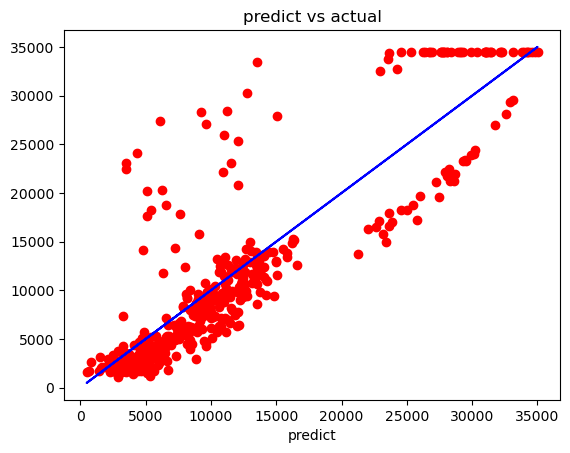

In [186]:
plt.scatter(y_pred, y_test, color = 'red')
plt.plot(y_pred, ml.predict(x_test), color = 'blue')

plt.title('predict vs actual')
plt.xlabel('predict')
plt.show()

# creating def function for run every model easyly and easy to visiable accuracy

In [221]:
model_list = []
mean_absolute_error_list = []
mean_squared_error_list = []
root_mean_sqared_error_list = []
R2_score = []
from sklearn import metrics

In [247]:
def Model_features(x_train , y_train , x_test , y_test , y_pred , model_name):

    mean_absolute_error ,mean_squared_error , root_mean_sqared_error , R2= round(metrics.mean_absolute_error(y_test , y_pred),ndigits=2), round(metrics.mean_squared_error(y_test,y_pred),ndigits=2) , round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),ndigits=2), round(metrics.r2_score(y_test,y_pred),ndigits=2)
    

    print(f'mean_absolute_error :{mean_absolute_error}')
    print(f'mean_squared_error :{mean_squared_error}')
    print(f'root_mean_sqared_error :{root_mean_sqared_error}')
    print(f'R2_score :{R2}')

    model_list.append(model_name)
    mean_absolute_error_list.append(mean_absolute_error)
    mean_squared_error_list.append(mean_squared_error)
    root_mean_sqared_error_list.append(root_mean_sqared_error)
    R2_score.append(R2)

## LinearRegression

In [223]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "LinearRegression" )

mean_absolute_error :2247.23
mean_squared_error :19002829.45
root_mean_sqared_error :4359.22
R2_score :0.82


In [224]:
model_list

['LinearRegression']

In [225]:
metrics.mean_absolute_error(y_test , y_pred)

2247.233901741296

## DecisionTreeRegressor

In [226]:
from sklearn.tree import DecisionTreeRegressor

In [227]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [228]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "DecisionTreeRegressor" )

mean_absolute_error :2584.7
mean_squared_error :35720829.74
root_mean_sqared_error :5976.69
R2_score :0.65


## KNeighborsRegressor

In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [231]:
kn = KNeighborsRegressor()

In [232]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [233]:
y_pred = kn.predict(x_test)

In [234]:
Model_features(x_train , y_train , x_test , y_test , y_pred ,  "KNeighborsRegression" )

mean_absolute_error :2824.1
mean_squared_error :22353965.43
root_mean_sqared_error :4728.0
R2_score :0.78


## Support Vector Machine

In [240]:
from sklearn.svm import SVR

In [241]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)

In [242]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "SVR" )

mean_absolute_error :7438.27
mean_squared_error :109738615.95
root_mean_sqared_error :10475.62
R2_score :-0.06


##  RandomForestRegressor

In [244]:
from sklearn.ensemble import RandomForestRegressor

In [245]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [246]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "RandomForestRegresser" )

mean_absolute_error :2275.74
mean_squared_error :19462469.66
root_mean_sqared_error :4411.63
R2_score :0.81


## Containg Dict to view all scorce in Dataframe

In [248]:
dict = {'Model_name':model_list,'mean_absolute_error' :mean_absolute_error_list,'mean_squared_error' : mean_squared_error_list, 'root_mean_sqared_error' :root_mean_sqared_error_list, 'R2_score': R2_score}
model_selection = pd.DataFrame(dict).sort_values(ascending = True , by = 'root_mean_sqared_error')
model_selection

,Model_name,mean_absolute_error,mean_squared_error,root_mean_sqared_error,R2_score
0,LinearRegression,2247.23,1.900283e+07,4359.22,0.82
5,RandomForestRegresser,2275.74,1.946247e+07,4411.63,0.81
2,KNeighborsRegression,2824.10,2.235397e+07,4728.00,0.78
1,DecisionTreeRegressor,2584.70,3.572083e+07,5976.69,0.65
3,SVR,7438.27,1.097386e+08,10475.62,-0.06
4,SVR,7438.27,1.097386e+08,10475.62,-0.06


## linear regression gives a good accuracy